# Coursera Capstone Project Continued

##### After we have cleaned our data, we are now ready to visualize the data and start building our model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import time
from scipy import stats
from sklearn import preprocessing
import matplotlib.pylab as plt
%matplotlib inline

# Loading the Data (Cleaned Data)

In [2]:
#Reading the cleaned data set
df = pd.read_csv("Data.csv")

In [3]:
df.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATES,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,INCMONTH,INCYEAR
0,2,2,0,0,2,2,2,0,1,4,7,5,3,2013
1,1,2,0,0,2,2,1,9,4,6,7,2,12,2006
2,1,4,0,0,3,3,1,5,4,4,0,5,11,2004
3,1,3,0,0,3,4,1,4,4,1,0,5,3,2013
4,2,2,0,0,2,2,2,0,1,6,7,5,1,2004


In [4]:
df.shape

(127359, 14)

In [5]:
df.dtypes

SEVERITYCODE     int64
PERSONCOUNT      int64
PEDCOUNT         int64
PEDCYLCOUNT      int64
VEHCOUNT         int64
INCDATES         int64
ADDRTYPE         int64
COLLISIONTYPE    int64
JUNCTIONTYPE     int64
WEATHER          int64
ROADCOND         int64
LIGHTCOND        int64
INCMONTH         int64
INCYEAR          int64
dtype: object

# Data Visualization

### The graph below shows the change in number of accidents per year from 2004 till 2020 (2020 Data is only till May)

<AxesSubplot:xlabel='INCYEAR'>

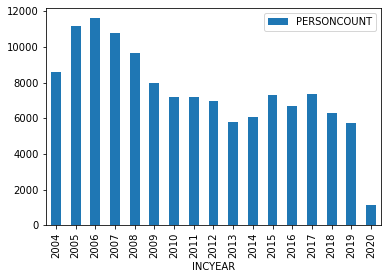

In [6]:
df[["INCYEAR","PERSONCOUNT"]].groupby("INCYEAR").count().plot(kind='bar')

### The graph below shows the change in number of accidents over months of the year. Since 2020 data is not for a complete year we will exclude it in this part of the analysis

<AxesSubplot:xlabel='INCMONTH'>

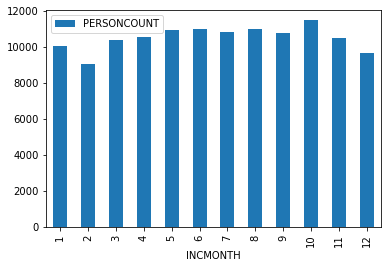

In [7]:
df2=df[df["INCYEAR"]!=2020]
df2[["INCMONTH","PERSONCOUNT"]].groupby("INCMONTH").count().plot(kind='bar')

### The graph below shows the change in number of accidents over the days of the week

<AxesSubplot:xlabel='INCDATES'>

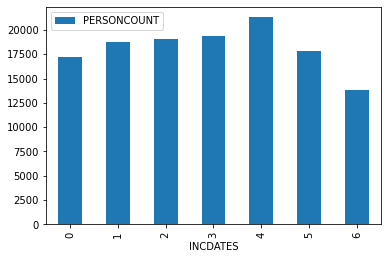

In [8]:
df[["INCDATES","PERSONCOUNT"]].groupby("INCDATES").count().plot(kind='bar')

# Balancing the Data

In [9]:
df["SEVERITYCODE"].value_counts()

1    86651
2    40708
Name: SEVERITYCODE, dtype: int64

##### As you can see, our data has more incidents of severity code 1 than code 2, we need to balance the data set.

In [10]:
from sklearn.utils import resample
df_max =df[df.SEVERITYCODE ==1]
df_min =df[df.SEVERITYCODE ==2]
df_max_ds = resample(df_max, 
                               replace = False,
                               n_samples= 40708,
                               random_state = 123
                              )

df_balance = pd.concat([df_max_ds,df_min])
df_balance.SEVERITYCODE.value_counts()

2    40708
1    40708
Name: SEVERITYCODE, dtype: int64

In [11]:
df_balance.tail()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATES,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,INCMONTH,INCYEAR
127350,2,1,0,0,1,6,1,4,4,6,7,7,12,2018
127354,2,2,0,0,2,4,1,0,4,1,7,5,1,2019
127355,2,3,0,0,2,0,1,2,4,1,0,5,11,2018
127356,2,3,0,0,2,5,2,3,1,1,0,5,1,2019
127357,2,2,0,1,1,1,2,1,1,1,0,6,1,2019


# Train-Test Split

### Creating the X and Y features

In [12]:
# We will define our independent variables in a feature we will call X
X=df_balance[["PERSONCOUNT","PEDCOUNT","PEDCYLCOUNT","VEHCOUNT","INCDATES","ADDRTYPE","COLLISIONTYPE","JUNCTIONTYPE","WEATHER","ROADCOND","LIGHTCOND"]].values
X[0:5]

array([[2, 0, 0, 2, 2, 1, 0, 4, 1, 0, 5],
       [2, 0, 0, 2, 5, 1, 9, 4, 4, 0, 5],
       [2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 5],
       [5, 0, 0, 2, 2, 1, 8, 2, 6, 7, 2],
       [3, 0, 0, 2, 1, 1, 7, 3, 1, 0, 5]])

In [13]:
# We will define out dependent variables in a feature we will call Y
Y=df_balance[["SEVERITYCODE"]].values
Y[0:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

### Normalize the data

In [14]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.37058857, -0.25089875, -0.2243384 ,  0.09771941, -0.47624075,
        -0.88225354, -1.3620328 ,  1.12570881, -0.7030964 , -0.61502854,
         0.57384267],
       [-0.37058857, -0.25089875, -0.2243384 ,  0.09771941,  1.09600259,
        -0.88225354,  1.64613961,  1.12570881,  0.74354951, -0.61502854,
         0.57384267],
       [-0.37058857, -0.25089875, -0.2243384 ,  0.09771941, -0.47624075,
         1.12404651, -1.3620328 , -1.02787323, -0.7030964 , -0.61502854,
         0.57384267],
       [ 1.72399924, -0.25089875, -0.2243384 ,  0.09771941, -0.47624075,
        -0.88225354,  1.31189823, -0.31001255,  1.70798012,  1.64034522,
        -1.55369302],
       [ 0.32760736, -0.25089875, -0.2243384 ,  0.09771941, -1.00032187,
        -0.88225354,  0.97765685,  0.40784813, -0.7030964 , -0.61502854,
         0.57384267]])

##### We will define 30 % of the data as testing anf 70% as training 

In [15]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (56991, 11) (56991, 1)
Test set: (24425, 11) (24425, 1)


# Methadology

##### At this point we are ready to begin testing different classification algorithms. Our project is a typical classification problem as we  attempts to learn the relationship between a set of feature variables and a target variable of interest. The aim is to find the best classification algorithm that will be able to predict the "SEVERITYCODE" of a certain incident given a defined X attributes with the highest accuracy. We will test k-nearest neighbor, Decision Tree, Support Vector Machine & Logistic Regression. 

# K-Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 25
mean_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train.ravel())
    Yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, Yhat)

mean_acc

array([0.6326305 , 0.63009212, 0.64978506, 0.64532242, 0.66002047,
       0.6593654 , 0.66321392, 0.66423746, 0.66976459, 0.66792221,
       0.66992835, 0.66857728, 0.67353122, 0.66988741, 0.67533265,
       0.67422723, 0.67590583, 0.67463664, 0.67676561, 0.67692938,
       0.67828045, 0.67737973, 0.67795292, 0.67520983])

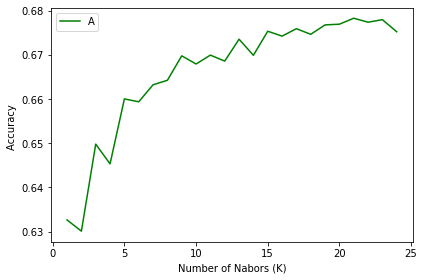

The best accuracy was with 0.6782804503582395 with k= 21


In [17]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend('Accuracy')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

### Creating the KNN Model with the best K values which is 21

In [18]:
k =21
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train.ravel())
yhat = neigh.predict(X_test)
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Yhat))

Train set Accuracy:  0.6987243599866646
Test set Accuracy:  0.6752098259979529


### KNN Model Evaluation

In [19]:
from sklearn.metrics import jaccard_similarity_score
jaccard_KNN=jaccard_similarity_score(Y_test, Yhat)
jaccard_KNN

0.6752098259979529

In [20]:
from sklearn.metrics import f1_score
f1_KNN=f1_score(Y_test, Yhat, average='weighted')
f1_KNN

0.6752108560431431

# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
AccidentTree=DecisionTreeClassifier(criterion="entropy", max_depth = 4)
AccidentTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
AccidentTree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
predAccident= AccidentTree.predict(X_test)

In [24]:
from sklearn import metrics
print("AccidentTrees's Accuracy: ", metrics.accuracy_score(Y_test, predAccident))

AccidentTrees's Accuracy:  0.6893756397134084


### Decision Tree Model Evaluation

In [25]:
from sklearn.metrics import jaccard_similarity_score
jaccard_DT=jaccard_similarity_score(Y_test, predAccident)
jaccard_DT

0.6893756397134084

In [26]:
from sklearn.metrics import f1_score
f1_DT=f1_score(Y_test, predAccident, average='weighted')
f1_DT

0.6843349221458243

# Support Vector Machine

In [27]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train.ravel()) 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [28]:
YhatSVM = clf.predict(X_test)

### SVM Model Evaulation

In [29]:
jaccard_SVM=jaccard_similarity_score(Y_test, YhatSVM)
jaccard_SVM

0.6738587512794268

In [30]:
f1_SVM=f1_score(Y_test, YhatSVM, average='weighted')
f1_SVM

0.6738235318096121

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train.ravel())
Yhat = LR.predict(X_test)
Yhat

array([1, 2, 1, ..., 1, 2, 1])

In [32]:
Yhat_prob = LR.predict_proba(X_test)

### Logistic Regression Model Evaulation

In [33]:
jaccard_LR=jaccard_similarity_score(Y_test, Yhat)
jaccard_LR

0.6612896622313204

In [34]:
f1_LR=f1_score(Y_test, Yhat, average='weighted')
f1_LR

0.6603246096341822

In [35]:
from sklearn.metrics import log_loss
log_loss_LR=log_loss(Y_test, Yhat_prob)
log_loss_LR

0.6023200134410428

# Model Comparison

In [36]:
jaccard_Score=[jaccard_KNN,jaccard_DT,jaccard_SVM,jaccard_LR]
f1_score=[f1_KNN,f1_DT,f1_SVM,f1_LR]
Log_loss=["NA","NA","NA",log_loss_LR]
df_Report=pd.DataFrame(jaccard_Score,index=["KNN","Decision Tree","SVM","Logistic Regression"])
df_Report.columns=["Jaccard"]
df_Report.insert(loc=1,column="F1-Score",value=f1_score)
df_Report.insert(loc=2,column="Log Loss",value=Log_loss)
df_Report.columns.name='Algorithm'
df_Report

Algorithm,Jaccard,F1-Score,Log Loss
KNN,0.675210,0.675211,NA
Decision Tree,0.689376,0.684335,NA
SVM,0.673859,0.673824,NA
Logistic Regression,0.661290,0.660325,0.60232


# Discussion & Conclusion

##### Based on the evaluation metric results listed above, we can say that all 4 algorithms have resulted in almost a similar result. The best accuracy is with the Decision Tree alogrithm which has an accuracy percentage of about 69%. Although, we can confidently say that our model with the decision tree can predict whether an accident will result in a severity code 1 or 2, the accuracy is not that high. Our model seems to be underfitted. Since we have many attributes which contribute to the severity of the accident, we can say that collecting more data of more accidents will help increase the accuracy of the model. We have lost quite a number of data in the cleaning process which was mainly due to some attributes being missed in the collection of the data. 

# References

##### 1. Association for Safe International Road Travel
https://www.asirt.org/safe-travel/road-safety-facts/#:~:text=Annual%20United%20States%20Road%20Crash,enough%20to%20require%20medical%20attention.